<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [165]:
import matplotlib.pyplot as plt

% matplotlib inline

In [166]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [167]:
boston_df = pd.concat([y, X], axis=1)
boston_df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [168]:
#Data Shape
boston_df.shape

(506, 14)

In [169]:
#Data Types
boston_df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [170]:
#Null Values by Column
boston_df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [171]:
#Basic summary statistics
boston_df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [172]:
#Number of unique values for columns

boston_df.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

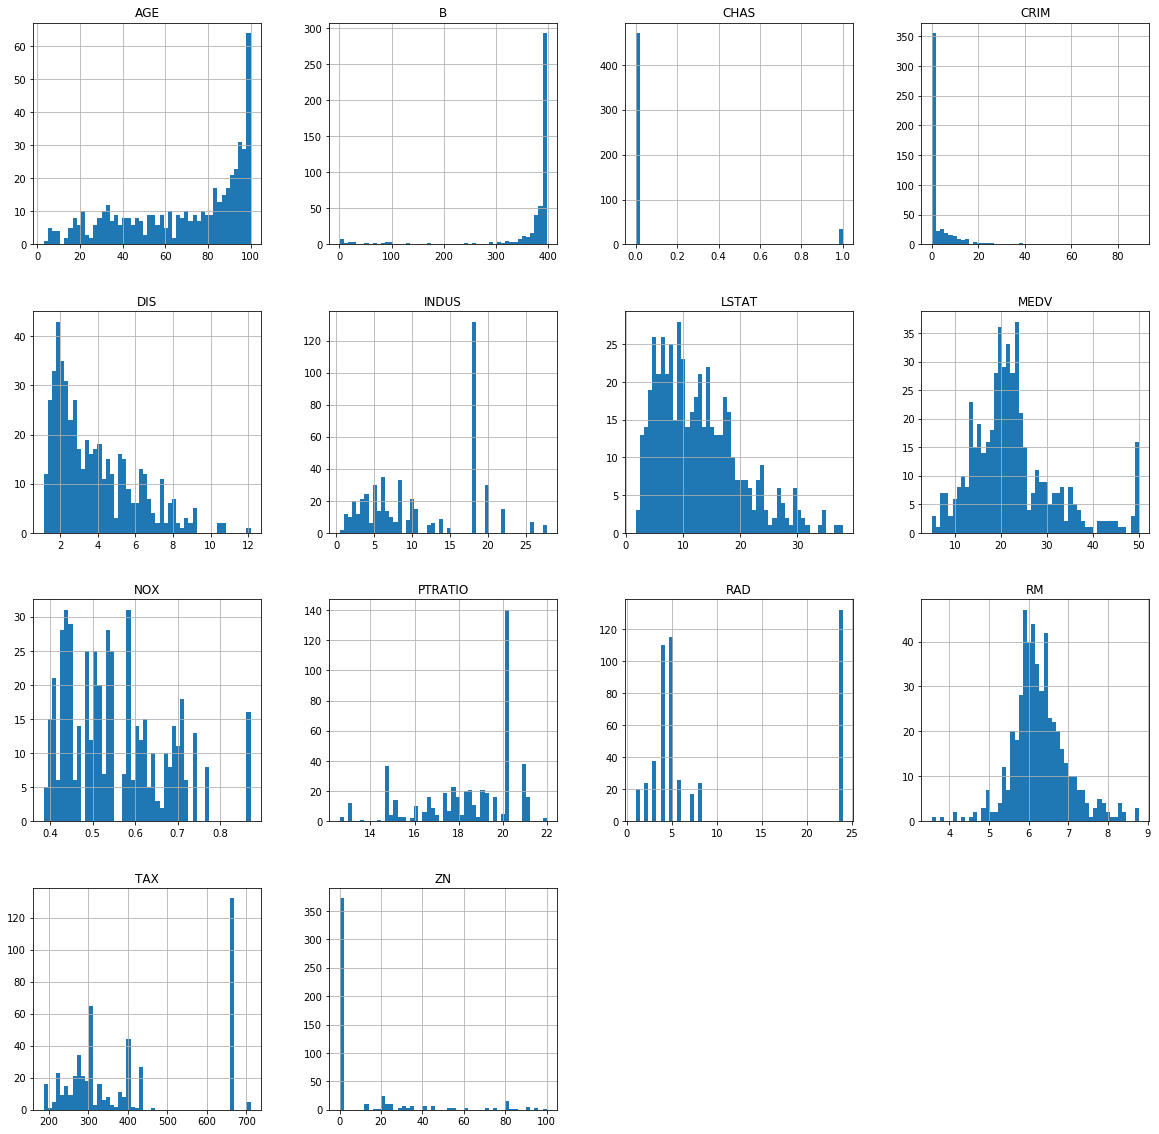

In [173]:
#Plot of the distribution of each column

axes = boston_df.hist(figsize=(20, 20), bins=50)


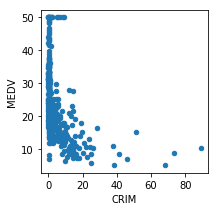

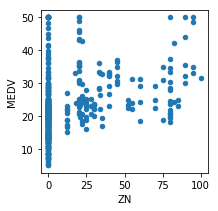

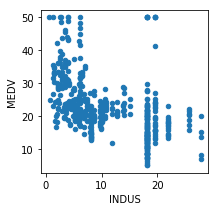

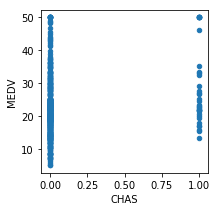

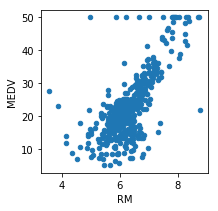

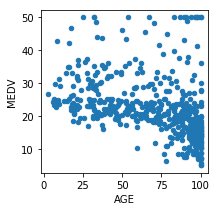

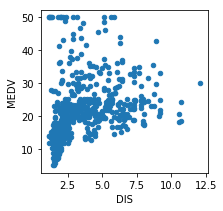

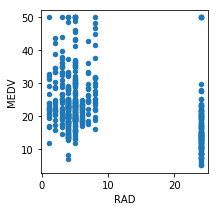

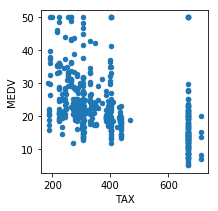

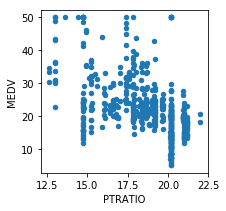

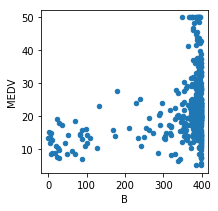

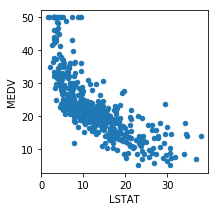

In [174]:
#Scatterplot of each column with median price
ax = boston_df.plot(kind='scatter', x='CRIM', y ='MEDV', figsize=(3,3))
ax1 = boston_df.plot(kind='scatter', x='ZN', y='MEDV', figsize=(3,3))
ax2 = boston_df.plot(kind='scatter', x='INDUS', y='MEDV', figsize=(3,3))
ax3 = boston_df.plot(kind='scatter', x='CHAS', y='MEDV',figsize=(3,3))
ax4 = boston_df.plot(kind='scatter', x='RM', y='MEDV',figsize=(3,3))
ax5 = boston_df.plot(kind='scatter', x='AGE', y='MEDV',figsize=(3,3))
ax6 = boston_df.plot(kind='scatter', x='DIS', y='MEDV',figsize=(3,3))
ax7 = boston_df.plot(kind='scatter', x='RAD', y='MEDV',figsize=(3,3))
ax8 = boston_df.plot(kind='scatter', x='TAX', y='MEDV',figsize=(3,3))
ax9 = boston_df.plot(kind='scatter', x='PTRATIO', y='MEDV',figsize=(3,3))
ax10 = boston_df.plot(kind='scatter', x='B', y='MEDV',figsize=(3,3))
ax11 = boston_df.plot(kind='scatter', x='LSTAT', y='MEDV',figsize=(3,3))



- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [175]:
from sklearn import metrics
y_new = boston_df.loc[:, 'MEDV']

null_pred = np.zeros(len(y_new)) + np.mean(y_new)
null_mse = metrics.mean_squared_error(null_pred, y_new)
print(null_mse)

84.41955615616554


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [176]:
#import train test split and linear regression functiond

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#view features to predict MDV
boston_df.head()

#pick variable features to predict MEDV
col_features = ['CRIM','AGE','LSTAT','RM']

X_train, X_test, y_train, y_test = train_test_split(X[col_features], y, train_size=0.7, test_size=.3, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)


0.6128679837955325

In [177]:
#mse of 70% of data
y_new = y_train.loc[:, 'MEDV']

null_pred = np.zeros(len(y_new)) + np.mean(y_new)
null_mse = metrics.mean_squared_error(null_pred, y_new)
print(null_mse)

85.73836868396693


In [178]:
#mse of 30% of data
y_new = y_test.loc[:, 'MEDV']

null_pred = np.zeros(len(y_new)) + np.mean(y_new)
null_mse = metrics.mean_squared_error(null_pred, y_new)
print(null_mse)

81.23417893005539


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [179]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

In [180]:
list(kf.split(X,y))

[(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  14,
          15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  54,  55,  56,
          57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  74,  75,  77,  78,  79,  80,  81,  83,  84,  86,
          87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114,
         115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129,
         130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157,
         158, 159, 160, 161, 162, 164, 166, 168, 169, 170, 171, 172, 173,
         174, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 189,
         190, 191, 192, 193, 194, 195,

In [181]:
mse_scores = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.iloc[train_indices, :]
    y_train = y.iloc[train_indices]
    lr.fit(X_train, y_train)
    
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    y_pred = lr.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

np.array(mse_scores).mean()

23.535438749691668

In [182]:
#cross validate across 70% of train data
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
kf = model_selection.KFold(n_splits=10, shuffle=True)

#-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()

23.07443575894741

In [183]:
#cross validate across 30% of test data
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
kf = model_selection.KFold(n_splits=10, shuffle=True)

#-cross_val_score(lr, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')
-cross_val_score(lr, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean()

90.57174000628126

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The linear regression model MSE wasn't very different from the null MSE which mean the model might not have as much predictive value above just guessing the mean every time.

The Kfold cross validation model had a smaller avg. MSE compared to the null model MSE. It has low variance compared to the null model. 



- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?



In [184]:
#There was not much of a difference. However, the test avg. MSE had even less variation compared to the training avg. MSE. 

- How much of a bias problem does your model appear to have? Why do you say that?

A high bias problem. The large difference from the null MSE suggests that it is less flexible than the null model and closer to fitting a linear regression model with normalized data points. 

- How much of a variance problem does your model appear to have? Why do you say that?

Not as much of a variance problem. However, its high bias problem will be problematic for making predictions based on new data sets. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [185]:
#import train test split and linear regression function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#view features to predict MDV
boston_df.head()

#pick variable features to predict MEDV
col_features = ['AGE','LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[col_features], y, train_size=0.7, test_size=.3, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.5093055437879551

In [186]:
#cross validate across 70% of train data
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
kf = model_selection.KFold(n_splits=10, shuffle=True)

#-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()

38.97882399348454

In [187]:
#cross validate across 30% of test data
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
kf = model_selection.KFold(n_splits=10, shuffle=True)

#-cross_val_score(lr, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')
-cross_val_score(lr, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean()

40.904902368248784

Changing the variables in the model added more variability to the training and test set, thereby making it more flexible for furture predictions. 

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap

# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20

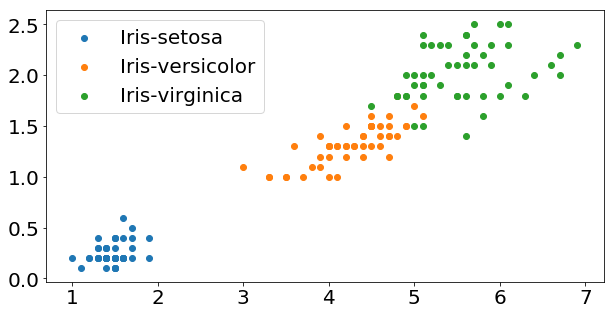

In [190]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


fig, ax = plt.subplots()
for species in iris.loc[:, 'species'].unique():
    ax.scatter(data=iris.loc[iris.loc[:, 'species'] == species, :], x='petal_length', y='petal_width', label=species)
    ax.legend();



- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [191]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [192]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [193]:
#data shape
print(iris.shape)
#data types
print(iris.dtypes)

(150, 6)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object


In [194]:
#null values
boston_df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [195]:
#basic stats
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [196]:
#number of unique values for each columsnm
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

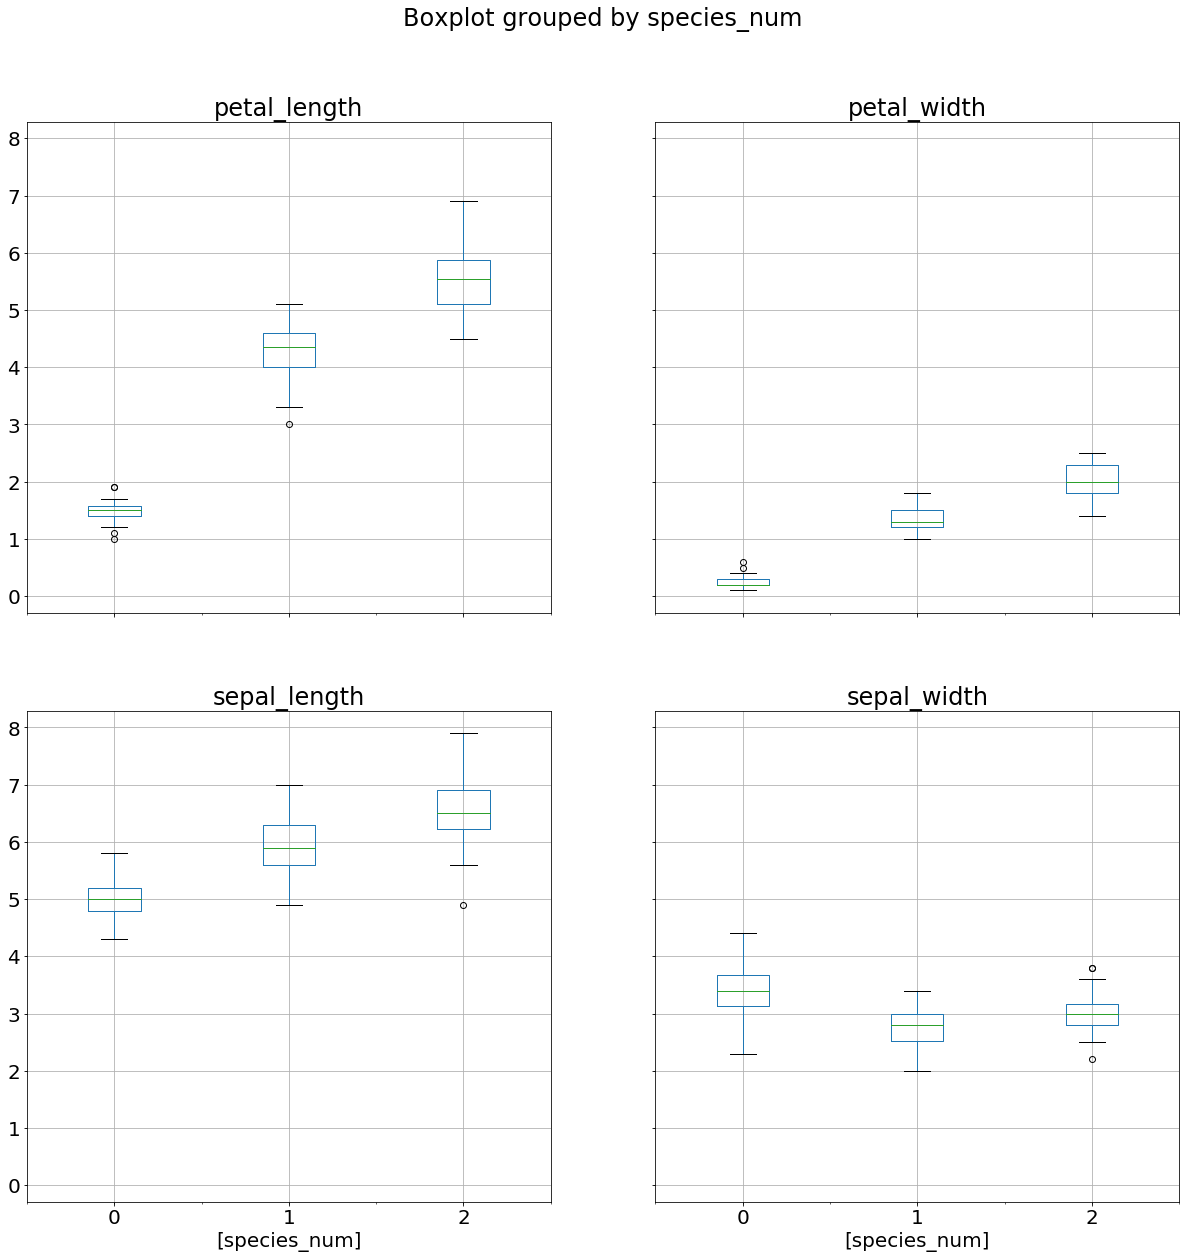

In [197]:
#distribution by species
ax = iris.boxplot(by='species_num', figsize=(20, 20));


In [198]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Get the accuracy of a null model that simply predicts the most common species.

In [209]:
# Import estimator class and other sklearn tools

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Create feature matrix (X).

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:, feature_cols]


# Create response vector (y).

y = iris.loc[:,'species_num']


# Find the accuracy of a null model, i.e. the frequency of the most frequent class
frequencies = y_train.value_counts().sort_values(ascending=False)
total = frequencies.sum()
biggest_frequency = frequencies.iloc[0]
biggest_frequency / total

0.3392857142857143

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [208]:
# Create response vector (y).
feature_cols = ['sepal_length', 'petal_width']
X = iris.loc[:, feature_cols]

# Create response vector (y).

y = iris.loc[:,'species_num']

#Split X and y into training and testing sets (using `random_state` for reproducibility).

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#KNN
#Train the estimator on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#Test the estimator on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

#Repeat for K=50.
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))




#CROSS VALIDATION (train)
scores = cross_val_score(knn, X_train, y_train, cv=10)
#print(scores)
print(np.mean(scores))



#CROSS VALIDATION (test)
scores = cross_val_score(knn, X_test, y_pred_class, cv=10)
#print(scores)
print(np.mean(scores))


0.868421052631579
0.9473684210526315
0.9401515151515152
0.3666666666666667


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Compared to the null model, the training set has more variance.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test model was almost exact to the null model which means it probably doesn't have much predective value. It has a high bias and won't be great for predicting new data. Compared to the training set, the test model was not as flexible.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

More of a bias problem. It is almost exact to the null model. 

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [207]:
# Create response vector (y).
feature_cols = ['petal_length', 'sepal_width',]
                
X = iris.loc[:, feature_cols]

# Create response vector (y).

y = iris.loc[:,'species_num']

#Split X and y into training and testing sets (using `random_state` for reproducibility).

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#KNN
#Train the estimator on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#Test the estimator on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

#Repeat for K=50.
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))



#CROSS VALIDATION (train)
scores = cross_val_score(knn, X_train, y_train, cv=10)
#print(scores)
print(np.mean(scores))


#CROSS VALIDATION (test)
scores = cross_val_score(knn, X_test, y_pred_class, cv=10)
#print(scores)
print(np.mean(scores))




0.9210526315789473
0.9210526315789473
0.8803030303030303
0.48166666666666663


Changing variables led to my test model becoming more valuable for predictions by becoming having less bias and more variance. 

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

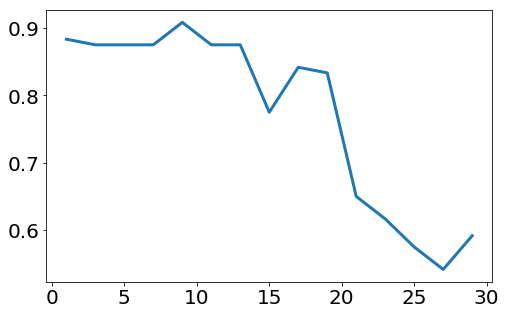

0.9083333333333332


In [201]:
k_values = list(range(1,30,2))
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_test, y_test, cv=10)
    accs.append(np.mean(scores))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print(np.max(accs))

# - **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))